In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import sys

In [12]:
path = '/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection'
os.chdir(path)
os.getcwd()

'/Users/ngochoang/Library/CloudStorage/GoogleDrive-nhungoc1508@gmail.com/My Drive/Graduate/Semester 1 (Fall 2024)/INFO-H423 Data Mining/Project/SNCB_IncidentClassifier/models/anomaly_detection'

In [23]:
dirs = []
for f in os.listdir('./results'):
    if '.' not in f and f.startswith('20241206'):
        dirs.append(f)
dirs[-1]

'20241206_192939_w200_l15'

In [24]:
results = []
for dir in dirs:
    file_path = f'{os.getcwd()}/results/{dir}/NDCG.json'
    _, _, w, l = dir.split('_')
    ret = dict()
    ret['w'] = int(w[1:])
    ret['l'] = int(l[1:])
    try:
        with open(file_path, 'r') as file:
            scores = json.load(file)
            ret['ndcg_mean_test'] = scores['ndcg_mean_test']
            ret['ndcg_median_test'] = scores['ndcg_median_test']
    except:
        print(f'{w}_{l} has no results')
        ret['ndcg_mean_test'] = np.nan
        ret['ndcg_median_test'] = np.nan
    results.append(ret)

w30_l5 has no results
w30_l5 has no results
w30_l5 has no results
w30_l5 has no results
w30_l5 has no results
w30_l5 has no results
w30_l5 has no results
w30_l5 has no results


In [25]:
scores_df = pd.DataFrame.from_dict(results)
scores_df = scores_df.sort_values(by=['w', 'l'], ascending=[False, True])
scores_df = scores_df.reset_index().drop(columns=['index'], axis=1)
scores_df.head()

,w,l,ndcg_mean_test,ndcg_median_test
0,200,3,0.894237,0.991360
1,200,5,0.891045,0.992158
2,200,7,0.885589,0.991883
3,200,10,0.881210,0.989691
4,200,12,0.877698,0.988220


In [26]:
# df_count.pivot_table(index='race_agg', columns='profession', values='nconst')
scores_pv = scores_df.pivot_table(index='w', columns='l', values='ndcg_mean_test', aggfunc=max).sort_index(ascending=False)
scores_pv

l,3,5,7,10,12,15,20
w,,,,,,,
200,0.894237,0.891045,0.885589,0.881210,0.877698,0.878109,0.879983
150,0.887205,0.881690,0.874302,0.872669,0.871766,0.871200,0.868114
120,0.882187,0.877607,0.873829,0.866567,0.865648,0.864683,0.862148
100,0.878959,0.871605,0.866794,0.861867,0.856915,0.857032,0.854846
70,0.861269,0.850243,0.846040,0.841392,0.839409,0.832901,0.828502
50,0.847115,0.836348,0.831140,0.827334,0.823149,0.818828,0.817780
30,0.813766,0.803834,0.800266,0.793043,0.790904,0.790737,0.785816


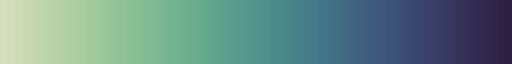

In [27]:
cmap = sns.cubehelix_palette(start=0.5, rot=-.75, as_cmap=True)
cmap

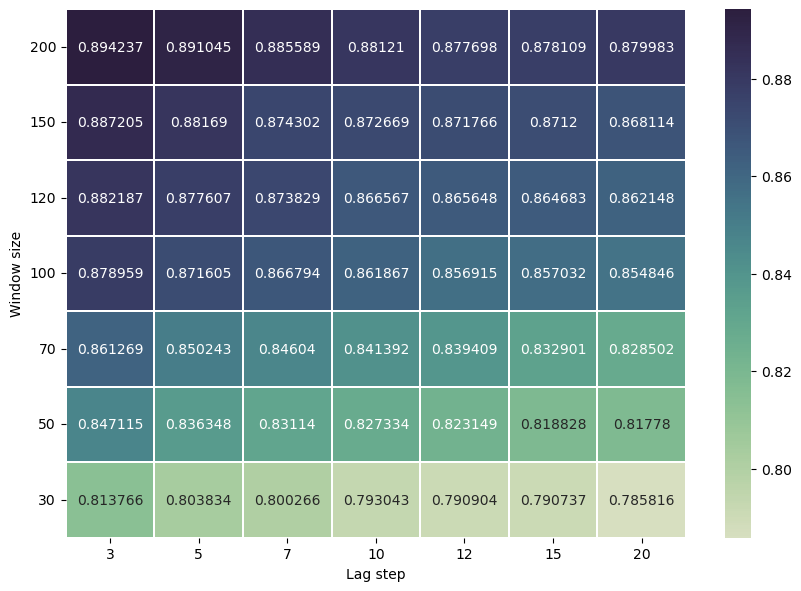

In [28]:
plt.figure(figsize=(10, 7), dpi=100)

vmax = scores_pv.fillna(0).values.max()
vmin = scores_pv.fillna(999).values.min()
sns.heatmap(scores_pv, linewidth=0.3, annot=True, fmt='n', cmap=cmap, mask=scores_pv.isnull(),
            vmin=vmin, vmax=vmax)
plt.xlabel('Lag step')
plt.ylabel('Window size')
plt.yticks(rotation=0)

plt.show()